<a href="https://colab.research.google.com/github/Wenwen777/epoch/blob/master/DSProject8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

part a.
2 principal components since X has 2 dimensions

Part b. Cov(X) = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1.5 \end{bmatrix}

In [2]:
# part C
w,v = np.linalg.eig([[1,0.5],[0.5, 1.5]])
print("eigenvalues of Cov(x) are", w)
print("eigenvectors of Cov(x) are", v)

eigenvalues of Cov(x) are [0.69098301 1.80901699]
eigenvectors of Cov(x) are [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [3]:
xmean = [0,0]
covx = [[1,0.5],[0.5, 1.5]]

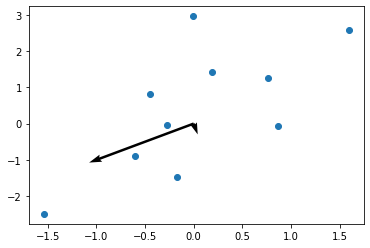

In [17]:

n = 10
X = np.random.multivariate_normal(xmean, covx, n)
w, v = np.linalg.eig(np.matmul(X.T, X))
scale = w/np.min(w)*3
cov_10 = np.cov(X.T)

origin = np.array(([0,0],[0,0]))
plt.scatter(X[:,0], X[:,1])
plt.quiver(*origin, v[:,0], v[:,1], scale = scale)



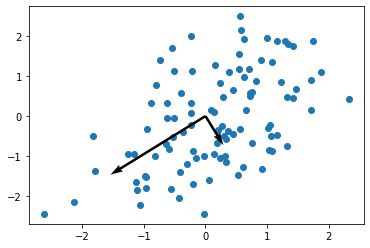

In [18]:
n = 100
X = np.random.multivariate_normal(xmean, covx, n)
w, v = np.linalg.eig(np.matmul(X.T, X))
scale = w/np.min(w)*3
cov_100 = np.cov(X.T)

origin = np.array(([0,0],[0,0]))
plt.scatter(X[:,0], X[:,1])
plt.quiver(*origin, v[:,0], v[:,1], scale = scale)

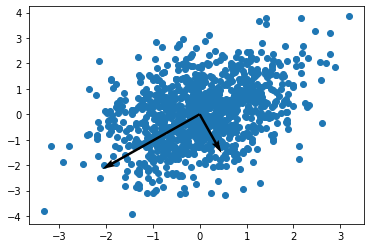

In [19]:
n = 1000
X = np.random.multivariate_normal(xmean, covx, n)
w, v = np.linalg.eig(np.matmul(X.T, X))
scale = w/np.min(w)*3
cov_1000 = np.cov(X.T)

origin = np.array(([0,0],[0,0]))
plt.scatter(X[:,0], X[:,1])
plt.quiver(*origin, v[:,0], v[:,1], scale = scale)

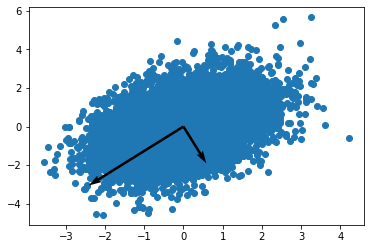

In [20]:
n = 10000
X = np.random.multivariate_normal(xmean, covx, n)
w, v = np.linalg.eig(np.matmul(X.T, X))
scale = w/np.min(w)*3
cov_10000 = np.cov(X.T)

origin = np.array(([0,0],[0,0]))
plt.scatter(X[:,0], X[:,1])
plt.quiver(*origin, v[:,0], v[:,1], scale = scale)

Text(0.5, 0, 'n')

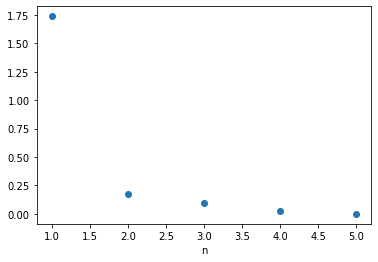

In [27]:
# Part d
diffs = np.zeros((5,1))
diffs[0] = np.linalg.norm(cov_10- covx)
diffs[1] = np.linalg.norm(cov_100- covx)
diffs[2] = np.linalg.norm(cov_1000- covx)
diffs[3] = np.linalg.norm(cov_10000- covx)
diffs[4] = 0

xa = np.linspace(1,5,5)
plt.plot(xa, diffs, 'o')


We can see that as n gets larger, the difference between the covarience matrix gets smaller and eventlly converge to 0

part e. The convergence proves the central limit theorem. As the number of samples increase, the distrubution gets more and more towards normal distrubtion.

# 2. K-means

A. Partition each dataset using k-means clustering, and plot the resulting clusters, color-coding data points by cluster.

In [9]:
gmm = pd.read_csv("https://raw.githubusercontent.com/ds4ph-bme/project-8-Wenwen777/main/gmm.csv?token=GHSAT0AAAAAAB2MNXKN5TBOP6ACZEXEMYOEY22BRXA", index_col = 0)
swissroll = pd.read_csv("https://raw.githubusercontent.com/ds4ph-bme/project-8-Wenwen777/main/swissroll.csv?token=GHSAT0AAAAAAB2MNXKNV2RP7U3I6FPOLWC6Y22BTAA", index_col = 0)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred = kmeans.fit_predict(gmm)
# kmeans.cluster_centers_

kmeans1 = KMeans(n_clusters=2, random_state=0)
y_pred1 = kmeans1.fit_predict(swissroll)
# kmeans1.cluster_centers_


In [15]:
gmm['clusters'] = kmeans.labels_
swissroll['clusters'] = kmeans1.labels_

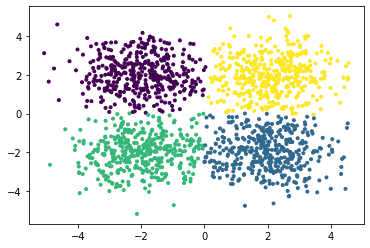

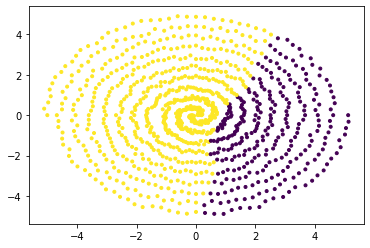

In [16]:
plt.scatter(gmm["X_1"], gmm["X_2"], marker = '.', c = gmm["clusters"])
plt.figure()
plt.scatter(swissroll["X_1"], swissroll["X_2"], marker = '.', c = swissroll["clusters"])

Part b. The gmm data looks like 4 clusters on each quandrant, so I chose 4 for gmm. The swissroll data looks like 2 lines of dots swriling into each other, so I chose 2 for swissroll.

Part c.
The k-means performs very well for the gmm data since k means is able to find 4 clusters based on using 4 centers and finding the closest data points to the centers and keep adjusting, so the gmm data is perfect for k-means.

The swissroll data, on the other hand, did not perform well. It is not very suitable for k-means since the "clusters" are not really clustered. Therefore, k-means doesn't know how to cluster these, so it just had 2 centers on each side of the roll and found its nearest data. 

In the case for swissroll, we can use another method of clustering that doesn't depend on the distance from the centers.
